<a href="https://colab.research.google.com/github/schumbar/CMPE258/blob/main/assignment_05/CMPE258_Assignment05_PartB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 05 Part B - Pytorch
By Shawn Chumbar

## Assignment Description
Notes:
1. You must create a 3 layer neural network.
2. You must use einsum.
3. Use 3 variables based on non-linear equation.
4. Generate syntetic data using the equation you used and plot using 4-d plot in matplotlib.

Perform the following tasks:
Write a colab creating pytorch from scratch. Be sure to use a 3 layer deep neural network for non-linear regression without using PyTorch built-in layer functionality.


### References Used
1. [Tensors Fundamentals and PyTorch](https://docs.google.com/presentation/d/13Oo5gXwcsoq9oMC4XriAyxkvgicatBxfI4cZzDhRyiE/edit#slide=id.g826a355833_0_525)
2. [deep_learning_fundamentals_part1.ipynb](https://colab.research.google.com/drive/1HS3qbHArkqFlImT2KnF5pcMCz7ueHNvY?usp=sharing&authuser=1#scrollTo=EGkS6nN6dQaz)

## Setup

Import the necessary libraries: PyTorch, NumPy, and Matplotlib.



In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

## Helper Functions
We create the generate_data(), train(), plot_3d(), CustomDataset() class, and Net() class.

The generate_data() function is defined to generate synthetic data. It creates input features x randomly sampled from a uniform distribution and corresponding target values y using predefined true weights and biases. Note that we use 3 dimensions for this function.


In [ ]:
# Generate synthetic data (using the method from my code)
def generate_data(num_samples):
    x = np.random.uniform(-1, 1, (num_samples, 3))
    weights_true = np.array([[2, -1, 0.5], [1, 2, -1], [-1, 1.5, 2]])
    bias_true = np.array([0.5, -1, 1])
    y_true = x @ weights_true + bias_true
    return torch.from_numpy(x).float(), torch.from_numpy(y_true).float()

 A custom dataset class CustomDataset is defined to encapsulate the input features and target values. It allows easy access to the data during training.

In [ ]:
# Create a custom dataset
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

A 3-layer neural network class named 'Net' is defined using PyTorch's nn.Module. It consists of two hidden layers with ReLU activation and an output layer.

In [ ]:
# Create a 3-layer neural network
class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Net, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size)
        self.hidden2 = nn.Linear(hidden_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x

 The train() function is defined to handle the training loop. It iterates over the dataset for a specified number of epochs, performs forward and backward propagation, and updates the model parameters using an optimizer.

In [ ]:
# Training loop
def train(model, dataloader, criterion, optimizer, num_epochs):
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, data in enumerate(dataloader, 0):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(dataloader):.4f}")
    print("Training finished.")

The plot_3d() function is defined to visualize the real and predicted data in a 3D scatter plot using Matplotlib.

In [ ]:
# Plotting function (adjusted to handle 3D output)
def plot_3d(x, y, y_pred):
    fig = plt.figure(figsize=(12, 6))
    # Plot real data
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(x[:, 0], x[:, 1], y[:, 0], label='Real - 1st Dim', color='blue')
    ax1.scatter(x[:, 0], x[:, 1], y[:, 1], label='Real - 2nd Dim', color='red')
    ax1.scatter(x[:, 0], x[:, 1], y[:, 2], label='Real - 3rd Dim', color='green')
    ax1.set_title("Real Data")
    ax1.legend()
    # Plot predicted data
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(x[:, 0], x[:, 1], y_pred[:, 0], label='Predicted - 1st Dim', color='blue', alpha=0.5)
    ax2.scatter(x[:, 0], x[:, 1], y_pred[:, 1], label='Predicted - 2nd Dim', color='red', alpha=0.5)
    ax2.scatter(x[:, 0], x[:, 1], y_pred[:, 2], label='Predicted - 3rd Dim', color='green', alpha=0.5)
    ax2.set_title("Predicted Data")
    ax2.legend()
    plt.show()

## Tain Model Steps

### Create Synthetic Dataset

The code generates a synthetic dataset using generate_data() and creates a custom dataset and data loader using CustomDataset and torch.utils.data.DataLoader.

In [ ]:
# Generate synthetic data
num_samples = 1000
x, y = generate_data(num_samples)

# Create a custom dataset and data loader
dataset = CustomDataset(x, y)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

### Set Hyperparameters

 Hyperparameters such as **input_size**, **hidden_size**, **output_size**, **number of epochs**, and **learning_rate** are set.

In [ ]:
# Set hyperparameters
input_size = 3
hidden_size = 64
output_size = 3  # 3 to match the 3D output
num_epochs = 100
learning_rate = 0.01

### Instantiate Model, Loss Function, and Optimizer

The model, loss function (MSE), and optimizer (Adam) are instantiated.

In [ ]:
# Create the model, loss function, and optimizer
model = Net(input_size, hidden_size, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Training Model

The model is trained using the train function.

In [ ]:
# Train the model
train(model, dataloader, criterion, optimizer, num_epochs)

Epoch [1/100], Loss: 0.5589
Epoch [2/100], Loss: 0.0216
Epoch [3/100], Loss: 0.0039
Epoch [4/100], Loss: 0.0017
Epoch [5/100], Loss: 0.0011
Epoch [6/100], Loss: 0.0009
Epoch [7/100], Loss: 0.0009
Epoch [8/100], Loss: 0.0006
Epoch [9/100], Loss: 0.0005
Epoch [10/100], Loss: 0.0004
Epoch [11/100], Loss: 0.0005
Epoch [12/100], Loss: 0.0005
Epoch [13/100], Loss: 0.0004
Epoch [14/100], Loss: 0.0005
Epoch [15/100], Loss: 0.0004
Epoch [16/100], Loss: 0.0005
Epoch [17/100], Loss: 0.0005
Epoch [18/100], Loss: 0.0004
Epoch [19/100], Loss: 0.0005
Epoch [20/100], Loss: 0.0003
Epoch [21/100], Loss: 0.0004
Epoch [22/100], Loss: 0.0004
Epoch [23/100], Loss: 0.0003
Epoch [24/100], Loss: 0.0004
Epoch [25/100], Loss: 0.0004
Epoch [26/100], Loss: 0.0003
Epoch [27/100], Loss: 0.0004
Epoch [28/100], Loss: 0.0005
Epoch [29/100], Loss: 0.0005
Epoch [30/100], Loss: 0.0003
Epoch [31/100], Loss: 0.0005
Epoch [32/100], Loss: 0.0006
Epoch [33/100], Loss: 0.0006
Epoch [34/100], Loss: 0.0007
Epoch [35/100], Loss: 0

### Test the Model

After training, the model is tested on the input features x, and the predicted values are obtained.

In [ ]:
# Test the model
with torch.no_grad():
    test_data = x
    predicted = model(test_data).numpy()

Finally, the real and predicted data are plotted using the plot_3d function to visualize the results.

## Data Visualization

### Plotting Real v.s. Predicted Data

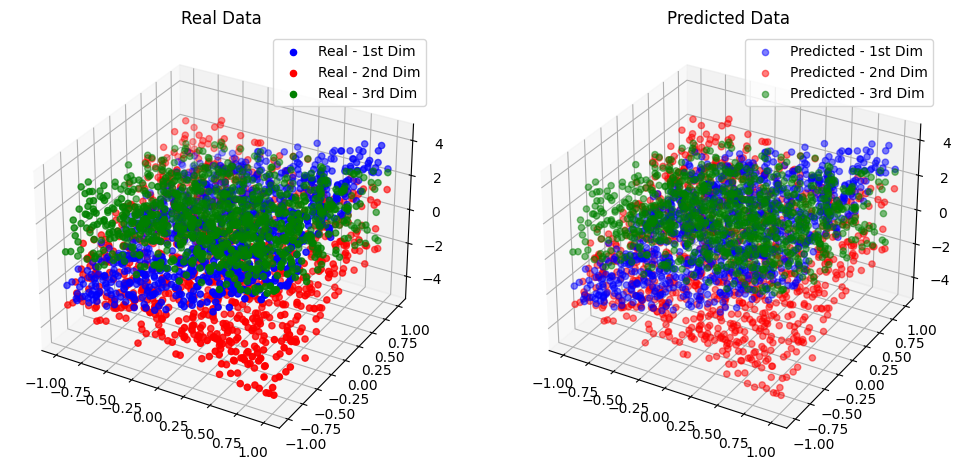

In [ ]:
# Plot the results
plot_3d(x, y, predicted)